In [3]:
%matplotlib inline

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import glob
import os
from os.path import basename
from pdf2image import convert_from_path

In [2]:
plt.rcParams['figure.figsize'] = [20, 35]

In [3]:
def plot(img):
    plt.imshow(img)
    plt.show()

In [4]:
dilated_images_path = 'dilated_imgs'
if not os.path.exists(dilated_images_path):
    os.mkdir(dilated_images_path)

In [5]:
images_path = './imgs/'
files = glob.glob(images_path + "*")

In [6]:
for file in files:
    image = cv2.imread(file, cv2.COLOR_BGR2GRAY)
    image = cv2.bitwise_not(image)
    kernel = np.ones((5,5),np.uint8)
    dilated_image = cv2.dilate(image,kernel,iterations = 1)
    new_path = os.path.join(dilated_images_path, basename(file))
    cv2.imwrite(new_path,dilated_image)

error: C:\projects\opencv-python\opencv\modules\core\src\matrix.cpp:991: error: (-215) dims <= 2 && step[0] > 0 in function cv::Mat::locateROI


In [ ]:
pdfs = glob.glob("./pdf/*.pdf")

for file in pdfs:
    pages = convert_from_path(file)
    for page in pages:
        filename = os.path.splitext(basename(file))[0]
        new_path = os.path.join(images_path, filename + ".jpg")
        page.save(new_path, 'JPEG')


In [7]:
pdfs = glob.glob("./pdf/*.pdf")

In [8]:
basename(pdfs[0])

'001.pdf'

In [9]:
images_path = './test/'
files = glob.glob(images_path + "*")
image = cv2.imread(files[0], cv2.COLOR_BGR2GRAY)

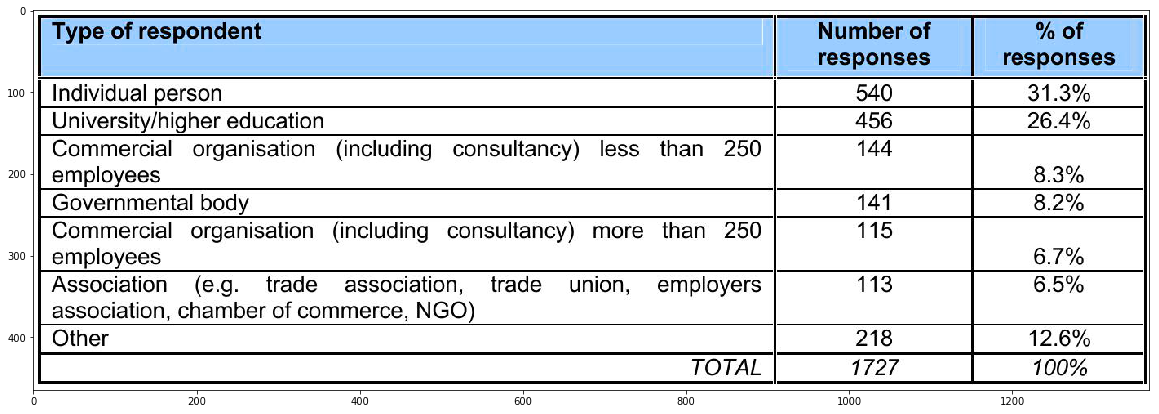

In [10]:
plot(image)

In [11]:
import pytesseract

In [12]:
pytesseract.image_to_string(image, config='--psm 5')

'n\n5 EISs\nSe ee| ge es ER\n8 izle] 29 Rio [218\n3 o| ols [NIL\n= aa\n33\n-\noc|o\n3 olt\naa a2 je |eis\n5a = {ats\n|\n=\nF/R ie |e\nN Q x\neile e|R\nQa\n£ / 2 |F |)\n2 2\n2g -\n2 | |2 |s\n_\nails |\n5 2\nea:\na | la |*\n8 1/8 |e6\n21/8 |g8\nSE lee\n3 3 Be\nS i\nis 22 8 A\nS§ | (3/5 318 loz\n@ |sisjP IS/2 [35\n8 g|2|5 26 oo\n& |Slels £ as\n® Beis olSIS als\neS g/S/E SIE/S Sle 2\n: alee sele ass\n9 |$|s BSE Slo 5\n2\n2 slele Bais 212 ale\nEISIS S1S|8 §2 85'

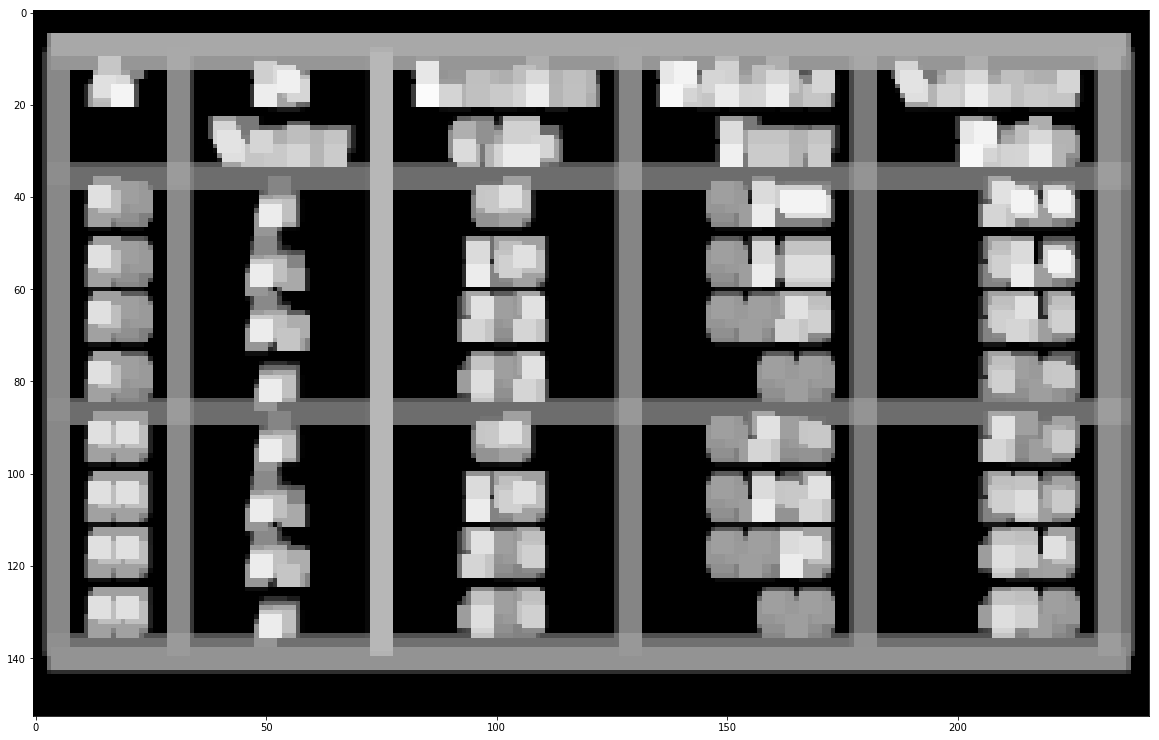

In [13]:
image = cv2.imread(files[-4], cv2.COLOR_BGR2GRAY)
plot(image)

In [10]:
# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector_create()
 
# Detect blobs.
keypoints = detector.detect(image)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
# cv2.imshow("Keypoints", im_with_keypoints)

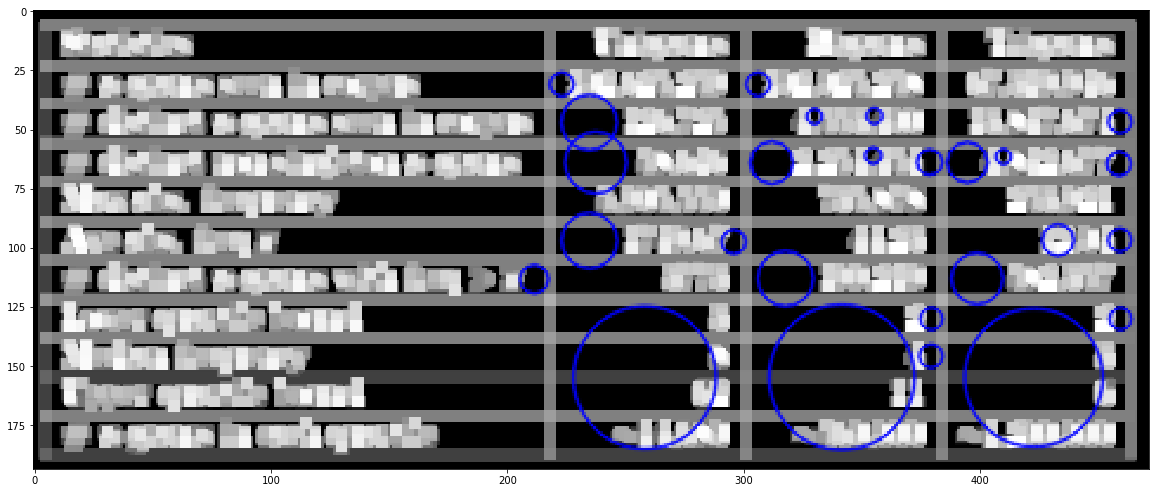

In [11]:
plot(im_with_keypoints)

In [14]:
import cv2

# Load the image
img = image

# convert to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# smooth the image to avoid noises
gray = cv2.medianBlur(gray,5)

# Apply adaptive threshold
thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)
thresh_color = cv2.cvtColor(thresh,cv2.COLOR_GRAY2BGR)

# apply some dilation and erosion to join the gaps - change iteration to detect more or less area's
thresh = cv2.dilate(thresh,None,iterations = 15)
thresh = cv2.erode(thresh,None,iterations = 15)

# Find the contours
image,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# For each contour, find the bounding rectangle and draw it
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.rectangle(thresh_color,(x,y),(x+w,y+h),(0,255,0),2)

# Finally show the image
cv2.imshow('img',img)
cv2.imshow('res',thresh_color)
cv2.waitKey(0)
cv2.destroyAllWindows()